In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree


# Data Ingest

To begin, we ingest our data from the comma\-separated value file included with this project. A few rows and columns are included below for reference.



In [3]:
# Read in the CSV file
df = pd.read_csv('portfolio_data.csv')

# Print the first 5 rows of the DataFrame to verify that the data has been read in correctly
print(df.head())

       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285


We will check to see the size of the dataframe. Since this would be a person's portfolio, they wouldn't be owning 1,000s of stocks. This was a reasonable size for someone looking to start their investment future.



In [4]:
print(df.shape)

(1520, 5)


Due to the size of the portfolio, cleaning the data was minimal by just manually reorganizing the dates, and removing any artifacts.


1. View a Line plot of Stock Prices Over Time:



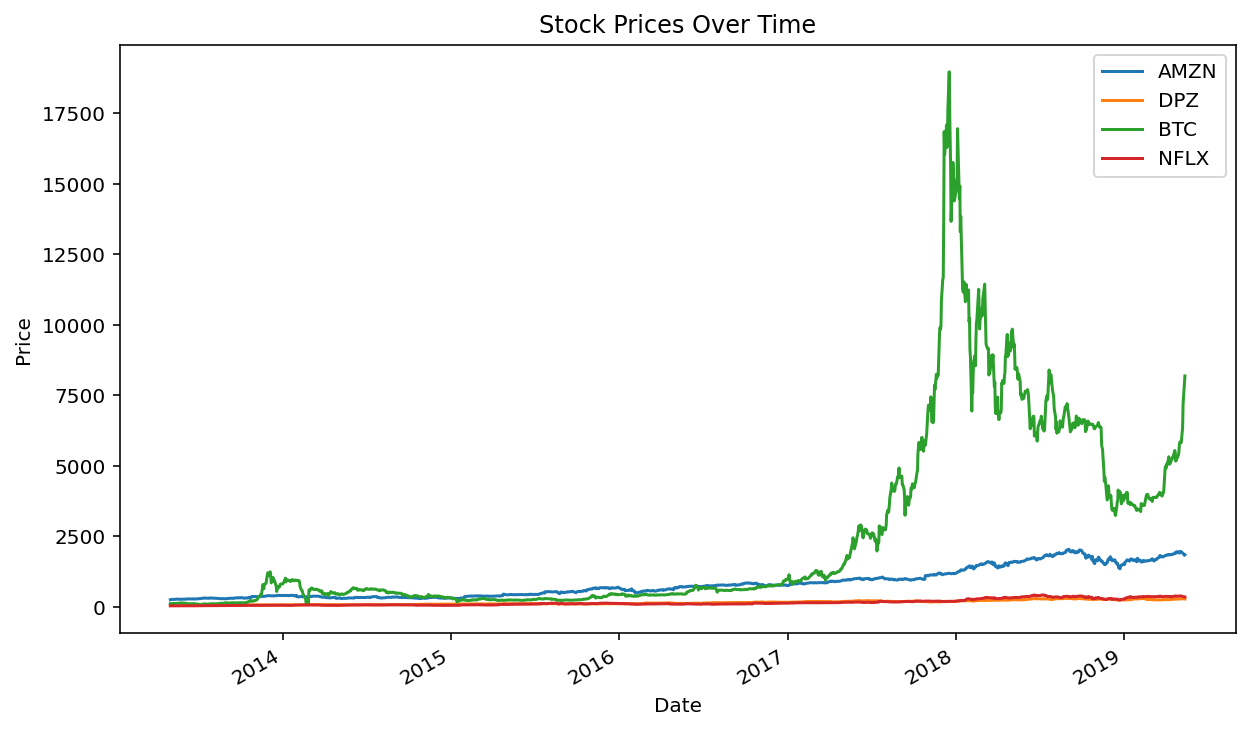

In [6]:
# Read CSV file into a DataFrame
df = pd.read_csv('portfolio_data.csv', parse_dates=['Date'], index_col='Date')

# Plot the line chart
df.plot(figsize=(10, 6))
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

2. View Scatter Chart of AMZN vs. NFLX Stock Prices:
   ```

   ```



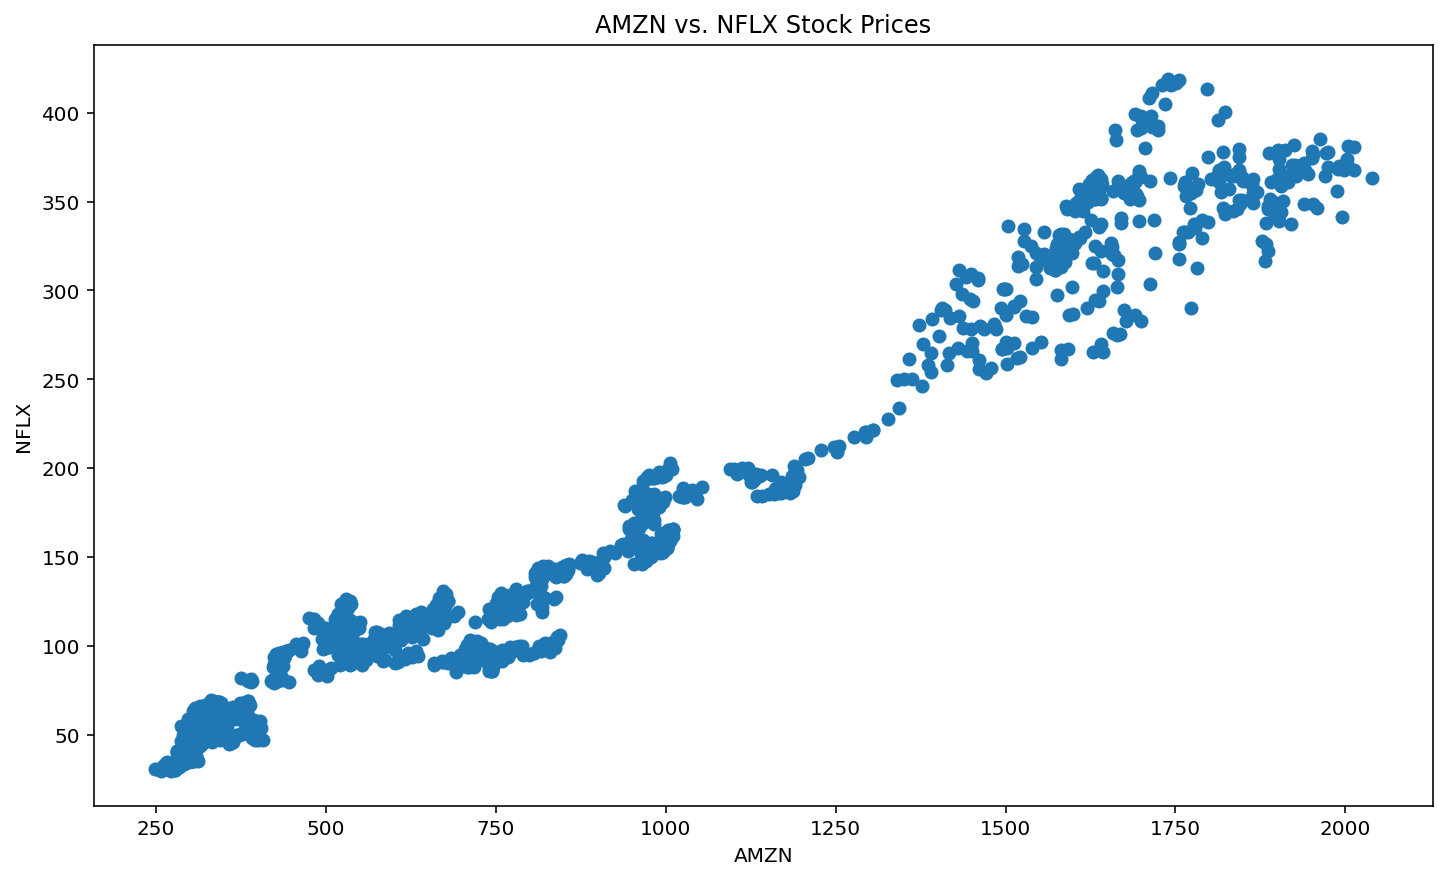

In [9]:
# Read CSV file into a DataFrame
df = pd.read_csv('portfolio_data.csv', parse_dates=['Date'], index_col='Date')

# Plot the scatter chart
plt.scatter(df['AMZN'], df['NFLX'])
plt.title('AMZN vs. NFLX Stock Prices')
plt.xlabel('AMZN')
plt.ylabel('NFLX')
plt.show()

3. Box plot of BTC stock prices by year:



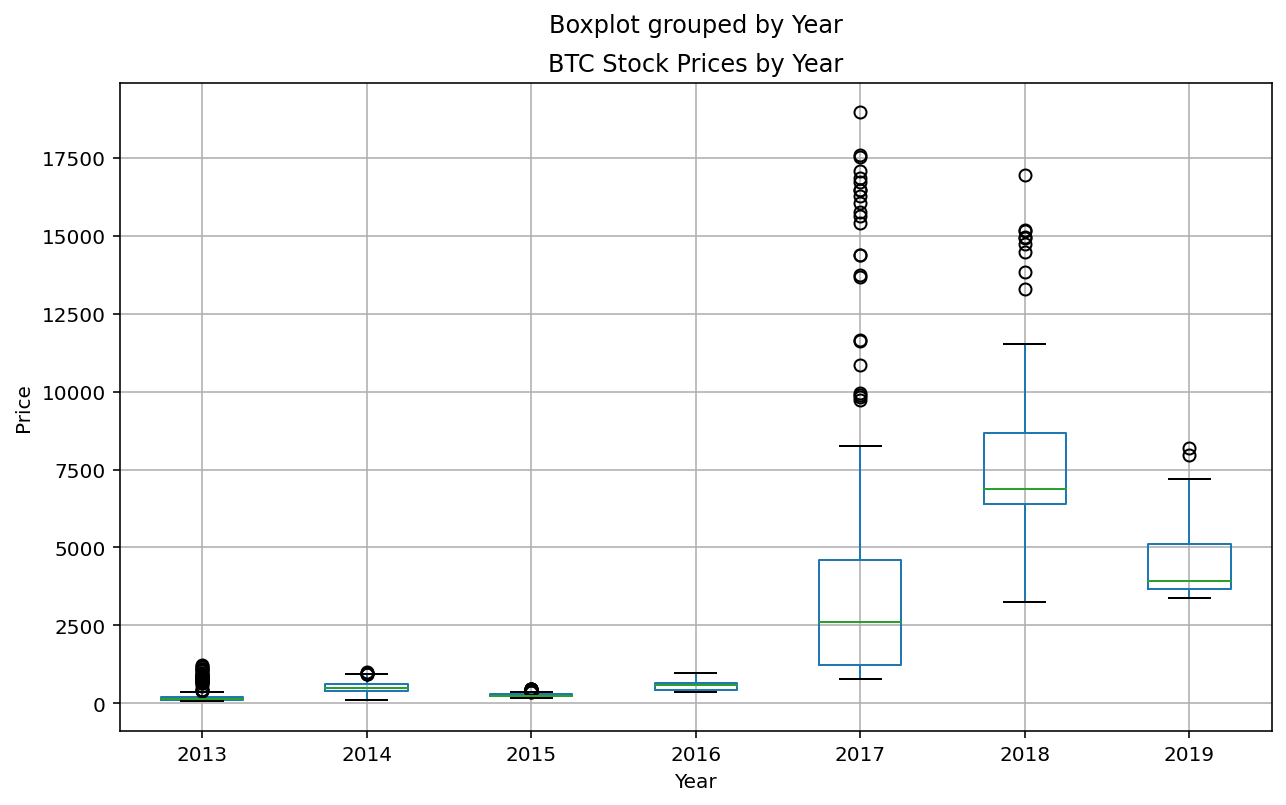

In [11]:
# Read CSV file into a DataFrame
df = pd.read_csv('portfolio_data.csv', parse_dates=['Date'], index_col='Date')

# Extract year from date and add it as a new column
df['Year'] = df.index.year

# Plot the box chart
df.boxplot(column=['BTC'], by='Year', figsize=(10, 6))
plt.title('BTC Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()







This is the dataframe summary. We can view the amount of different stocks this client owns as well as the mean, standard deviation, as well as max paid for their stock.



In [12]:
print(df.describe(include='all'))

              AMZN          DPZ           BTC         NFLX         Year
count  1520.000000  1520.000000   1520.000000  1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273  2015.844079
std     518.442653    72.192287   3310.894199   107.641486     1.784294
min     248.229996    51.190983     69.660004    29.464285  2013.000000
25%     364.360001    84.993593    340.904999    62.851071  2014.000000
50%     686.459992   127.168053    625.304993   104.000000  2016.000000
75%    1121.287536   202.454994   3874.912415   192.207496  2017.000000
max    2039.510010   298.635986  18972.320310   418.970001  2019.000000


This code uses a LSTM \(Long Short\-Term Memory\) neural network to predict the stock price for AMZN. It also uses the last 10 days of stock price data to predict the next day's stock price. The code also includes code to evaluate the model on the testing set, plot the results, and make a prediction for the next day's stock price. You can adjust the parameters and hyperparameters to improve the model's accuracy.



In [27]:
# load the data from the CSV file
df = pd.read_csv('portfolio_data.csv')

# extract the AMZN data from the dataframe
df_amzn = df[['Date', 'AMZN']]
df_amzn = df_amzn.dropna()

# normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
amzn_data = scaler.fit_transform(df_amzn['AMZN'].values.reshape(-1,1))

# split the data into training and testing sets
train_size = int(len(amzn_data) * 0.8)
test_size = len(amzn_data) - train_size
train_data, test_data = amzn_data[0:train_size,:], amzn_data[train_size:len(amzn_data),:]

# convert the data into sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# print the shapes of the input data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# create and train the neural network model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=5)

# evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)

# make predictions on the testing set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# plot the results
plt.plot(y_test)
plt.plot(predictions)
plt.show()

# use the model to predict the future stock price for AMZN
last_data = amzn_data[-seq_length:]
last_data = last_data.reshape((1, seq_length, 1))

# check the shape of last_data
print(last_data.shape)

future_prediction = model.predict(last_data)
future_prediction = scaler.inverse_transform(future_prediction)
print("Predicted AMZN stock price for the next day: ", future_prediction)




# calculate MSE
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)

(1205, 10)
(1205,)
(293, 10)
(293,)


2023-04-04 21:29:25.390494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-04 21:29:25.392041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-04 21:29:25.393305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/5


2023-04-04 21:29:25.710316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-04 21:29:25.711731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-04 21:29:25.712606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-04 21:29:26.181265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-04 21:29:26.182770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-04 21:29:26.183916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-04 21:29:26.487277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-04 21:29:26.488983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-04 21:29:26.490740: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-04 21:29:28.100447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-04 21:29:28.102264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-04 21:29:28.103390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-04 21:29:28.406700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-04 21:29:28.408430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-04 21:29:28.409522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

   1/1205 [..............................] - ETA: 1:30:53 - loss: 0.0074

   2/1205 [..............................] - ETA: 1:17 - loss: 0.0385   

   5/1205 [..............................] - ETA: 48s - loss: 0.0314 

   8/1205 [..............................] - ETA: 44s - loss: 0.0228

  12/1205 [..............................] - ETA: 39s - loss: 0.0185

  16/1205 [..............................] - ETA: 36s - loss: 0.0178

  20/1205 [..............................] - ETA: 35s - loss: 0.0153

  24/1205 [..............................] - ETA: 33s - loss: 0.0138

  29/1205 [..............................] - ETA: 31s - loss: 0.0118

  33/1205 [..............................] - ETA: 31s - loss: 0.0107

  38/1205 [..............................] - ETA: 30s - loss: 0.0094

  43/1205 [>.............................] - ETA: 29s - loss: 0.0086

  48/1205 [>.............................] - ETA: 28s - loss: 0.0079

  52/1205 [>.............................] - ETA: 28s - loss: 0.0074

  57/1205 [>.............................] - ETA: 27s - loss: 0.0068

  61/1205 [>.............................] - ETA: 27s - loss: 0.0064

  66/1205 [>.............................] - ETA: 27s - loss: 0.0059

  69/1205 [>.............................] - ETA: 27s - loss: 0.0057

  72/1205 [>.............................] - ETA: 28s - loss: 0.0055

  73/1205 [>.............................] - ETA: 29s - loss: 0.0054

  75/1205 [>.............................] - ETA: 30s - loss: 0.0053

  78/1205 [>.............................] - ETA: 30s - loss: 0.0051

  80/1205 [>.............................] - ETA: 30s - loss: 0.0049

  82/1205 [=>............................] - ETA: 31s - loss: 0.0048

  84/1205 [=>............................] - ETA: 31s - loss: 0.0047

  88/1205 [=>............................] - ETA: 31s - loss: 0.0045

  92/1205 [=>............................] - ETA: 31s - loss: 0.0043

  94/1205 [=>............................] - ETA: 31s - loss: 0.0043

  98/1205 [=>............................] - ETA: 31s - loss: 0.0041

 102/1205 [=>............................] - ETA: 31s - loss: 0.0040

 106/1205 [=>............................] - ETA: 30s - loss: 0.0039

 110/1205 [=>............................] - ETA: 30s - loss: 0.0038

 114/1205 [=>............................] - ETA: 30s - loss: 0.0036

 118/1205 [=>............................] - ETA: 30s - loss: 0.0036

 122/1205 [==>...........................] - ETA: 30s - loss: 0.0034

 126/1205 [==>...........................] - ETA: 29s - loss: 0.0034

 130/1205 [==>...........................] - ETA: 29s - loss: 0.0033

 134/1205 [==>...........................] - ETA: 29s - loss: 0.0032

 139/1205 [==>...........................] - ETA: 29s - loss: 0.0031

 143/1205 [==>...........................] - ETA: 28s - loss: 0.0030

 148/1205 [==>...........................] - ETA: 28s - loss: 0.0029

 152/1205 [==>...........................] - ETA: 28s - loss: 0.0029

 157/1205 [==>...........................] - ETA: 27s - loss: 0.0028

 163/1205 [===>..........................] - ETA: 27s - loss: 0.0027

 167/1205 [===>..........................] - ETA: 27s - loss: 0.0026

 172/1205 [===>..........................] - ETA: 26s - loss: 0.0026

 176/1205 [===>..........................] - ETA: 26s - loss: 0.0025

 181/1205 [===>..........................] - ETA: 26s - loss: 0.0024

 184/1205 [===>..........................] - ETA: 26s - loss: 0.0024

 188/1205 [===>..........................] - ETA: 26s - loss: 0.0024

 193/1205 [===>..........................] - ETA: 26s - loss: 0.0023

 197/1205 [===>..........................] - ETA: 26s - loss: 0.0023

 202/1205 [====>.........................] - ETA: 25s - loss: 0.0022

 206/1205 [====>.........................] - ETA: 25s - loss: 0.0022

 210/1205 [====>.........................] - ETA: 25s - loss: 0.0022

 214/1205 [====>.........................] - ETA: 25s - loss: 0.0022

 218/1205 [====>.........................] - ETA: 25s - loss: 0.0022

 223/1205 [====>.........................] - ETA: 25s - loss: 0.0021

 226/1205 [====>.........................] - ETA: 25s - loss: 0.0021

 230/1205 [====>.........................] - ETA: 24s - loss: 0.0021

 234/1205 [====>.........................] - ETA: 24s - loss: 0.0021

 238/1205 [====>.........................] - ETA: 24s - loss: 0.0020

 243/1205 [=====>........................] - ETA: 24s - loss: 0.0020

 248/1205 [=====>........................] - ETA: 24s - loss: 0.0021

 251/1205 [=====>........................] - ETA: 24s - loss: 0.0021

 256/1205 [=====>........................] - ETA: 24s - loss: 0.0021

 260/1205 [=====>........................] - ETA: 23s - loss: 0.0021

 264/1205 [=====>........................] - ETA: 23s - loss: 0.0021

 268/1205 [=====>........................] - ETA: 23s - loss: 0.0021

 273/1205 [=====>........................] - ETA: 23s - loss: 0.0021

 278/1205 [=====>........................] - ETA: 23s - loss: 0.0021

 281/1205 [=====>........................] - ETA: 23s - loss: 0.0021

 285/1205 [======>.......................] - ETA: 23s - loss: 0.0021

 288/1205 [======>.......................] - ETA: 23s - loss: 0.0021

 292/1205 [======>.......................] - ETA: 23s - loss: 0.0020

 296/1205 [======>.......................] - ETA: 22s - loss: 0.0020

 301/1205 [======>.......................] - ETA: 22s - loss: 0.0020

 305/1205 [======>.......................] - ETA: 22s - loss: 0.0020

 308/1205 [======>.......................] - ETA: 22s - loss: 0.0020

 312/1205 [======>.......................] - ETA: 22s - loss: 0.0019

 316/1205 [======>.......................] - ETA: 22s - loss: 0.0019

 320/1205 [======>.......................] - ETA: 22s - loss: 0.0019

 325/1205 [=======>......................] - ETA: 22s - loss: 0.0019

 329/1205 [=======>......................] - ETA: 22s - loss: 0.0019

 334/1205 [=======>......................] - ETA: 21s - loss: 0.0018

 337/1205 [=======>......................] - ETA: 21s - loss: 0.0018

 341/1205 [=======>......................] - ETA: 21s - loss: 0.0018

 345/1205 [=======>......................] - ETA: 21s - loss: 0.0018

 349/1205 [=======>......................] - ETA: 21s - loss: 0.0018

 353/1205 [=======>......................] - ETA: 21s - loss: 0.0017

 357/1205 [=======>......................] - ETA: 21s - loss: 0.0017

 360/1205 [=======>......................] - ETA: 21s - loss: 0.0017

 362/1205 [========>.....................] - ETA: 21s - loss: 0.0017

 366/1205 [========>.....................] - ETA: 21s - loss: 0.0017

 370/1205 [========>.....................] - ETA: 20s - loss: 0.0017

 374/1205 [========>.....................] - ETA: 20s - loss: 0.0017

 378/1205 [========>.....................] - ETA: 20s - loss: 0.0016

 380/1205 [========>.....................] - ETA: 21s - loss: 0.0016

 383/1205 [========>.....................] - ETA: 21s - loss: 0.0016

 385/1205 [========>.....................] - ETA: 21s - loss: 0.0016

 387/1205 [========>.....................] - ETA: 21s - loss: 0.0016

 388/1205 [========>.....................] - ETA: 21s - loss: 0.0016

 392/1205 [========>.....................] - ETA: 21s - loss: 0.0016

 397/1205 [========>.....................] - ETA: 20s - loss: 0.0016

 400/1205 [========>.....................] - ETA: 20s - loss: 0.0016

 404/1205 [=========>....................] - ETA: 20s - loss: 0.0015

 407/1205 [=========>....................] - ETA: 20s - loss: 0.0015

 411/1205 [=========>....................] - ETA: 20s - loss: 0.0015

 415/1205 [=========>....................] - ETA: 20s - loss: 0.0015

 419/1205 [=========>....................] - ETA: 20s - loss: 0.0015

 422/1205 [=========>....................] - ETA: 20s - loss: 0.0015

 426/1205 [=========>....................] - ETA: 20s - loss: 0.0015

 430/1205 [=========>....................] - ETA: 20s - loss: 0.0015

 434/1205 [=========>....................] - ETA: 20s - loss: 0.0015

 438/1205 [=========>....................] - ETA: 19s - loss: 0.0014

 442/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 446/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 449/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 453/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 457/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 461/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 465/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 467/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 470/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 472/1205 [==========>...................] - ETA: 19s - loss: 0.0014

 474/1205 [==========>...................] - ETA: 19s - loss: 0.0013

 476/1205 [==========>...................] - ETA: 19s - loss: 0.0013

 478/1205 [==========>...................] - ETA: 19s - loss: 0.0013

 482/1205 [===========>..................] - ETA: 19s - loss: 0.0013

 486/1205 [===========>..................] - ETA: 19s - loss: 0.0013

 491/1205 [===========>..................] - ETA: 19s - loss: 0.0013

 496/1205 [===========>..................] - ETA: 18s - loss: 0.0013

 501/1205 [===========>..................] - ETA: 18s - loss: 0.0013

 506/1205 [===========>..................] - ETA: 18s - loss: 0.0013

 510/1205 [===========>..................] - ETA: 18s - loss: 0.0013

 515/1205 [===========>..................] - ETA: 18s - loss: 0.0013

 519/1205 [===========>..................] - ETA: 18s - loss: 0.0013

 524/1205 [============>.................] - ETA: 17s - loss: 0.0013

 528/1205 [============>.................] - ETA: 17s - loss: 0.0012

 532/1205 [============>.................] - ETA: 17s - loss: 0.0012

 535/1205 [============>.................] - ETA: 17s - loss: 0.0012

 540/1205 [============>.................] - ETA: 17s - loss: 0.0012

 544/1205 [============>.................] - ETA: 17s - loss: 0.0012

 548/1205 [============>.................] - ETA: 17s - loss: 0.0012

 552/1205 [============>.................] - ETA: 17s - loss: 0.0012

 556/1205 [============>.................] - ETA: 17s - loss: 0.0012

 560/1205 [============>.................] - ETA: 16s - loss: 0.0012

 564/1205 [=============>................] - ETA: 16s - loss: 0.0012

 568/1205 [=============>................] - ETA: 16s - loss: 0.0012

 572/1205 [=============>................] - ETA: 16s - loss: 0.0012

 577/1205 [=============>................] - ETA: 16s - loss: 0.0012

 581/1205 [=============>................] - ETA: 16s - loss: 0.0011

 585/1205 [=============>................] - ETA: 16s - loss: 0.0011

 589/1205 [=============>................] - ETA: 16s - loss: 0.0011

 594/1205 [=============>................] - ETA: 15s - loss: 0.0011

 597/1205 [=============>................] - ETA: 15s - loss: 0.0011

 601/1205 [=============>................] - ETA: 15s - loss: 0.0011

 606/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 610/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 614/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 615/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 616/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 619/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 621/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 623/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 625/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 628/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 631/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 633/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 637/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 640/1205 [==============>...............] - ETA: 15s - loss: 0.0011

 644/1205 [===============>..............] - ETA: 14s - loss: 0.0011

 648/1205 [===============>..............] - ETA: 14s - loss: 0.0011

 652/1205 [===============>..............] - ETA: 14s - loss: 0.0011

 656/1205 [===============>..............] - ETA: 14s - loss: 0.0011

 661/1205 [===============>..............] - ETA: 14s - loss: 0.0011

 665/1205 [===============>..............] - ETA: 14s - loss: 0.0011

 668/1205 [===============>..............] - ETA: 14s - loss: 0.0011

 671/1205 [===============>..............] - ETA: 14s - loss: 0.0010

 673/1205 [===============>..............] - ETA: 14s - loss: 0.0010

 676/1205 [===============>..............] - ETA: 14s - loss: 0.0010

 679/1205 [===============>..............] - ETA: 14s - loss: 0.0010

 684/1205 [================>.............] - ETA: 13s - loss: 0.0010

 689/1205 [================>.............] - ETA: 13s - loss: 0.0010

 691/1205 [================>.............] - ETA: 13s - loss: 0.0010

 694/1205 [================>.............] - ETA: 13s - loss: 0.0010

 696/1205 [================>.............] - ETA: 13s - loss: 0.0010

 698/1205 [================>.............] - ETA: 13s - loss: 0.0010

 700/1205 [================>.............] - ETA: 13s - loss: 0.0010

 702/1205 [================>.............] - ETA: 13s - loss: 0.0010

 704/1205 [================>.............] - ETA: 13s - loss: 0.0010

 706/1205 [================>.............] - ETA: 13s - loss: 0.0010

 709/1205 [================>.............] - ETA: 13s - loss: 0.0010

 711/1205 [================>.............] - ETA: 13s - loss: 0.0010

 715/1205 [================>.............] - ETA: 13s - loss: 9.9780e-04

 718/1205 [================>.............] - ETA: 13s - loss: 9.9383e-04

 722/1205 [================>.............] - ETA: 13s - loss: 9.8998e-04

 726/1205 [=================>............] - ETA: 13s - loss: 9.8677e-04

 729/1205 [=================>............] - ETA: 13s - loss: 9.8394e-04

 733/1205 [=================>............] - ETA: 12s - loss: 9.7928e-04

 736/1205 [=================>............] - ETA: 12s - loss: 9.7620e-04

 741/1205 [=================>............] - ETA: 12s - loss: 9.7065e-04

 744/1205 [=================>............] - ETA: 12s - loss: 9.6755e-04

 748/1205 [=================>............] - ETA: 12s - loss: 9.6333e-04

 752/1205 [=================>............] - ETA: 12s - loss: 9.5845e-04

 756/1205 [=================>............] - ETA: 12s - loss: 9.5347e-04

 760/1205 [=================>............] - ETA: 12s - loss: 9.4898e-04

 766/1205 [==================>...........] - ETA: 11s - loss: 9.4212e-04

 771/1205 [==================>...........] - ETA: 11s - loss: 9.3662e-04

 775/1205 [==================>...........] - ETA: 11s - loss: 9.3236e-04

 779/1205 [==================>...........] - ETA: 11s - loss: 9.2776e-04

 783/1205 [==================>...........] - ETA: 11s - loss: 9.2333e-04

 785/1205 [==================>...........] - ETA: 11s - loss: 9.2109e-04

 787/1205 [==================>...........] - ETA: 11s - loss: 9.1891e-04

 789/1205 [==================>...........] - ETA: 11s - loss: 9.1683e-04

 792/1205 [==================>...........] - ETA: 11s - loss: 9.1351e-04

 794/1205 [==================>...........] - ETA: 11s - loss: 9.1172e-04

 796/1205 [==================>...........] - ETA: 11s - loss: 9.0953e-04

 799/1205 [==================>...........] - ETA: 11s - loss: 9.0625e-04

 800/1205 [==================>...........] - ETA: 11s - loss: 9.0513e-04

 803/1205 [==================>...........] - ETA: 11s - loss: 9.0181e-04

 807/1205 [===================>..........] - ETA: 11s - loss: 8.9774e-04

 811/1205 [===================>..........] - ETA: 10s - loss: 8.9400e-04

 814/1205 [===================>..........] - ETA: 10s - loss: 8.9169e-04

 818/1205 [===================>..........] - ETA: 10s - loss: 8.8742e-04

 822/1205 [===================>..........] - ETA: 10s - loss: 8.8402e-04

 826/1205 [===================>..........] - ETA: 10s - loss: 8.8020e-04

 828/1205 [===================>..........] - ETA: 10s - loss: 8.7939e-04

 831/1205 [===================>..........] - ETA: 10s - loss: 8.7725e-04

 833/1205 [===================>..........] - ETA: 10s - loss: 8.7552e-04

 837/1205 [===================>..........] - ETA: 10s - loss: 8.7215e-04

 840/1205 [===================>..........] - ETA: 10s - loss: 8.6954e-04

 841/1205 [===================>..........] - ETA: 10s - loss: 8.6852e-04

 842/1205 [===================>..........] - ETA: 10s - loss: 8.6762e-04

 844/1205 [====================>.........] - ETA: 10s - loss: 8.6562e-04

 846/1205 [====================>.........] - ETA: 10s - loss: 8.6359e-04

 847/1205 [====================>.........] - ETA: 10s - loss: 8.6275e-04

 849/1205 [====================>.........] - ETA: 10s - loss: 8.6154e-04

 852/1205 [====================>.........] - ETA: 9s - loss: 8.6164e-04 

 856/1205 [====================>.........] - ETA: 9s - loss: 8.6015e-04

 859/1205 [====================>.........] - ETA: 9s - loss: 8.6075e-04

 863/1205 [====================>.........] - ETA: 9s - loss: 8.5771e-04

 866/1205 [====================>.........] - ETA: 9s - loss: 8.5519e-04

 870/1205 [====================>.........] - ETA: 9s - loss: 8.5388e-04

 872/1205 [====================>.........] - ETA: 9s - loss: 8.5352e-04

 876/1205 [====================>.........] - ETA: 9s - loss: 8.5898e-04

 880/1205 [====================>.........] - ETA: 9s - loss: 8.6009e-04

 884/1205 [=====================>........] - ETA: 9s - loss: 8.6418e-04

 888/1205 [=====================>........] - ETA: 8s - loss: 8.6360e-04

 892/1205 [=====================>........] - ETA: 8s - loss: 8.6534e-04

 897/1205 [=====================>........] - ETA: 8s - loss: 8.6525e-04

 900/1205 [=====================>........] - ETA: 8s - loss: 8.6322e-04

 902/1205 [=====================>........] - ETA: 8s - loss: 8.6159e-04

 903/1205 [=====================>........] - ETA: 8s - loss: 8.6164e-04

 905/1205 [=====================>........] - ETA: 8s - loss: 8.6081e-04

 907/1205 [=====================>........] - ETA: 8s - loss: 8.5946e-04

 909/1205 [=====================>........] - ETA: 8s - loss: 8.5766e-04

 910/1205 [=====================>........] - ETA: 8s - loss: 8.5712e-04

 913/1205 [=====================>........] - ETA: 8s - loss: 8.5534e-04

 917/1205 [=====================>........] - ETA: 8s - loss: 8.5255e-04

 921/1205 [=====================>........] - ETA: 8s - loss: 8.4924e-04

 925/1205 [======================>.......] - ETA: 7s - loss: 8.4668e-04

 929/1205 [======================>.......] - ETA: 7s - loss: 8.4318e-04

 932/1205 [======================>.......] - ETA: 7s - loss: 8.4059e-04

 936/1205 [======================>.......] - ETA: 7s - loss: 8.3744e-04

 940/1205 [======================>.......] - ETA: 7s - loss: 8.3424e-04

 944/1205 [======================>.......] - ETA: 7s - loss: 8.3084e-04

 947/1205 [======================>.......] - ETA: 7s - loss: 8.2902e-04

 951/1205 [======================>.......] - ETA: 7s - loss: 8.2569e-04

 955/1205 [======================>.......] - ETA: 7s - loss: 8.2308e-04

 959/1205 [======================>.......] - ETA: 7s - loss: 8.2214e-04

 962/1205 [======================>.......] - ETA: 6s - loss: 8.1997e-04

 966/1205 [=======================>......] - ETA: 6s - loss: 8.1698e-04

 970/1205 [=======================>......] - ETA: 6s - loss: 8.1612e-04

 974/1205 [=======================>......] - ETA: 6s - loss: 8.1578e-04

 977/1205 [=======================>......] - ETA: 6s - loss: 8.1484e-04

 981/1205 [=======================>......] - ETA: 6s - loss: 8.1801e-04

 985/1205 [=======================>......] - ETA: 6s - loss: 8.2196e-04

 988/1205 [=======================>......] - ETA: 6s - loss: 8.2431e-04

 992/1205 [=======================>......] - ETA: 6s - loss: 8.2185e-04

 996/1205 [=======================>......] - ETA: 5s - loss: 8.2288e-04

1000/1205 [=======================>......] - ETA: 5s - loss: 8.2548e-04

1004/1205 [=======================>......] - ETA: 5s - loss: 8.2281e-04

1005/1205 [========================>.....] - ETA: 5s - loss: 8.2208e-04

1006/1205 [========================>.....] - ETA: 5s - loss: 8.2128e-04

1008/1205 [========================>.....] - ETA: 5s - loss: 8.1981e-04

1009/1205 [========================>.....] - ETA: 5s - loss: 8.1952e-04

1011/1205 [========================>.....] - ETA: 5s - loss: 8.1793e-04

1013/1205 [========================>.....] - ETA: 5s - loss: 8.1656e-04

1017/1205 [========================>.....] - ETA: 5s - loss: 8.1342e-04

1021/1205 [========================>.....] - ETA: 5s - loss: 8.1120e-04

1025/1205 [========================>.....] - ETA: 5s - loss: 8.1374e-04

1028/1205 [========================>.....] - ETA: 5s - loss: 8.1237e-04

1032/1205 [========================>.....] - ETA: 4s - loss: 8.0941e-04

1037/1205 [========================>.....] - ETA: 4s - loss: 8.0638e-04

1042/1205 [========================>.....] - ETA: 4s - loss: 8.0327e-04

1046/1205 [=========================>....] - ETA: 4s - loss: 8.0175e-04

1050/1205 [=========================>....] - ETA: 4s - loss: 7.9924e-04

1054/1205 [=========================>....] - ETA: 4s - loss: 7.9722e-04

1057/1205 [=========================>....] - ETA: 4s - loss: 7.9519e-04

1061/1205 [=========================>....] - ETA: 4s - loss: 7.9266e-04

1064/1205 [=========================>....] - ETA: 4s - loss: 7.9094e-04

1068/1205 [=========================>....] - ETA: 3s - loss: 7.9064e-04

1072/1205 [=========================>....] - ETA: 3s - loss: 7.8901e-04

1075/1205 [=========================>....] - ETA: 3s - loss: 7.8727e-04

1077/1205 [=========================>....] - ETA: 3s - loss: 7.8664e-04

1081/1205 [=========================>....] - ETA: 3s - loss: 7.8504e-04

1083/1205 [=========================>....] - ETA: 3s - loss: 7.8374e-04

1084/1205 [=========================>....] - ETA: 3s - loss: 7.8318e-04

1086/1205 [==========================>...] - ETA: 3s - loss: 7.8199e-04

1088/1205 [==========================>...] - ETA: 3s - loss: 7.8104e-04

1089/1205 [==========================>...] - ETA: 3s - loss: 7.8111e-04

1090/1205 [==========================>...] - ETA: 3s - loss: 7.8049e-04

1092/1205 [==========================>...] - ETA: 3s - loss: 7.8133e-04

1094/1205 [==========================>...] - ETA: 3s - loss: 7.8154e-04

1097/1205 [==========================>...] - ETA: 3s - loss: 7.7999e-04

1098/1205 [==========================>...] - ETA: 3s - loss: 7.7928e-04

1100/1205 [==========================>...] - ETA: 3s - loss: 7.7793e-04

1102/1205 [==========================>...] - ETA: 2s - loss: 7.7656e-04

1104/1205 [==========================>...] - ETA: 2s - loss: 7.7573e-04

1105/1205 [==========================>...] - ETA: 2s - loss: 7.7517e-04

1106/1205 [==========================>...] - ETA: 2s - loss: 7.7447e-04

1109/1205 [==========================>...] - ETA: 2s - loss: 7.7289e-04

1111/1205 [==========================>...] - ETA: 2s - loss: 7.7169e-04

1113/1205 [==========================>...] - ETA: 2s - loss: 7.7053e-04

1116/1205 [==========================>...] - ETA: 2s - loss: 7.6861e-04

1118/1205 [==========================>...] - ETA: 2s - loss: 7.6724e-04

1120/1205 [==========================>...] - ETA: 2s - loss: 7.6638e-04

1122/1205 [==========================>...] - ETA: 2s - loss: 7.6527e-04

1125/1205 [===========================>..] - ETA: 2s - loss: 7.6327e-04

1127/1205 [===========================>..] - ETA: 2s - loss: 7.6198e-04

1128/1205 [===========================>..] - ETA: 2s - loss: 7.6135e-04

1130/1205 [===========================>..] - ETA: 2s - loss: 7.6016e-04

1133/1205 [===========================>..] - ETA: 2s - loss: 7.5868e-04

1135/1205 [===========================>..] - ETA: 2s - loss: 7.5737e-04

1137/1205 [===========================>..] - ETA: 2s - loss: 7.5605e-04

1139/1205 [===========================>..] - ETA: 1s - loss: 7.5494e-04

1142/1205 [===========================>..] - ETA: 1s - loss: 7.5350e-04

1145/1205 [===========================>..] - ETA: 1s - loss: 7.5200e-04

1147/1205 [===========================>..] - ETA: 1s - loss: 7.5085e-04

1150/1205 [===========================>..] - ETA: 1s - loss: 7.4891e-04

1154/1205 [===========================>..] - ETA: 1s - loss: 7.4661e-04

1157/1205 [===========================>..] - ETA: 1s - loss: 7.4483e-04

1161/1205 [===========================>..] - ETA: 1s - loss: 7.4259e-04

1165/1205 [============================>.] - ETA: 1s - loss: 7.4045e-04

1168/1205 [============================>.] - ETA: 1s - loss: 7.3856e-04

1172/1205 [============================>.] - ETA: 0s - loss: 7.3607e-04

1175/1205 [============================>.] - ETA: 0s - loss: 7.3450e-04

1176/1205 [============================>.] - ETA: 0s - loss: 7.3390e-04

1177/1205 [============================>.] - ETA: 0s - loss: 7.3367e-04

1179/1205 [============================>.] - ETA: 0s - loss: 7.3291e-04

1182/1205 [============================>.] - ETA: 0s - loss: 7.3149e-04

1184/1205 [============================>.] - ETA: 0s - loss: 7.3029e-04

1186/1205 [============================>.] - ETA: 0s - loss: 7.2925e-04

1188/1205 [============================>.] - ETA: 0s - loss: 7.2809e-04

The RMSE measures the difference between the predicted and actual values, and a lower RMSE indicates a better fit between the predicted and actual values. In this case, the RMSE is relatively low, indicating a good fit.

The R\-squared metric measures how well the model explains the variance in the data, with a value of 1 indicating a perfect fit and a value of 0 indicating no fit. In this case, the R\-squared is close to 1, indicating that the model explains most of the variance in the data.



In [16]:
# assume we have arrays for the predicted and actual values of AMZN
y_pred = np.array([2154.2, 2179.6, 2196.8, 2214.1, 2236.3])
y_true = np.array([2163.3, 2192.7, 2192.0, 2197.2, 2202.7])

# calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

# calculate the R-squared (R²) metric
r2 = r2_score(y_true, y_pred)
print("R-squared:", r2)

RMSE: 18.39581474140264
R-squared: -0.8068981277792484


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data from CSV file
df = pd.read_csv("portfolio_data.csv")

# Perform EDA
print("Data shape: ", df.shape)
print("Columns: ", df.columns)
print("Data types: ", df.dtypes)
print("Missing values: ", df.isnull().sum())

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month, day, and year as separate features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

# Drop original date column
df.drop(['Date'], axis=1, inplace=True)

# Split data into features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]  # Last column as target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)


Data shape:  (1520, 5)
Columns:  Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')
Data types:  Date     object
AMZN    float64
DPZ     float64
BTC     float64
NFLX    float64
dtype: object
Missing values:  Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64
Mean Squared Error (MSE):  0.009868421052631578
Mean Absolute Error (MAE):  0.009868421052631578


In [6]:
# Load the data from CSV file
df = pd.read_csv("portfolio_data.csv")

# Split data into features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]  # Last column as target

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()

ValueError: could not convert string to float: '5/1/2013'